### 1. Accessing and Uploading Data

In [23]:
library(ggplot2)
library(tidyr)
library(corrplot)

In [3]:
case_data <- "/kaggle/input/google-trends-data/report.csv"
open_file  <- file(case_data, open = "r")

linecount <- 0
string_data <- ""
while (length(single_line <- readLines(open_file, n = 1, warn = FALSE)) > 0) {
  linecount <- linecount + 1
  
  if (linecount < 3) {
    case_data <- paste0(case_data,single_line)     
  }
  
  if (linecount == 5) column_headings = strsplit(single_line, ",")[[1]]
  
  if (linecount > 5) {

    if (gsub(pattern=",", x=single_line, replacement="") == "") break
    
    string_data <- paste0(string_data,single_line,"\n")
  }
}
close(open_file)

case_table <- read.table(textConnection(string_data), sep=",", header=FALSE, stringsAsFactors = FALSE)

names(case_table) <- column_headings

In [4]:
head(case_table)

,Week,data science,data scientist,analytics,google analytics,machine learning
,<chr>,<int>,<int>,<int>,<int>,<int>
1,2004-01-04 - 2004-01-10,2,0,5,0,3
2,2004-01-11 - 2004-01-17,2,0,6,0,3
3,2004-01-18 - 2004-01-24,2,0,6,0,4
4,2004-01-25 - 2004-01-31,3,0,7,0,4
5,2004-02-01 - 2004-02-07,2,0,8,0,4
6,2004-02-08 - 2004-02-14,1,0,6,0,4


In [5]:
column_headings

[1] "Week"             "data science"     "data scientist"   "analytics"       
[5] "google analytics" "machine learning"

In [6]:
# Change the Week Column name into ID
case_table$WeekID <- seq.int(nrow(case_table))
head(case_table)

,Week,data science,data scientist,analytics,google analytics,machine learning,WeekID
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,2004-01-04 - 2004-01-10,2,0,5,0,3,1
2,2004-01-11 - 2004-01-17,2,0,6,0,3,2
3,2004-01-18 - 2004-01-24,2,0,6,0,4,3
4,2004-01-25 - 2004-01-31,3,0,7,0,4,4
5,2004-02-01 - 2004-02-07,2,0,8,0,4,5
6,2004-02-08 - 2004-02-14,1,0,6,0,4,6


### 2. Data Exploration and Visualization

In [7]:
tail(case_table,n=10L)

,Week,data science,data scientist,analytics,google analytics,machine learning,WeekID
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
639,2016-03-27 - 2016-04-02,5,2,68,37,7,639
640,2016-04-03 - 2016-04-09,5,2,71,39,8,640
641,2016-04-10 - 2016-04-16,5,2,71,39,8,641
642,2016-04-17 - 2016-04-23,5,2,71,39,8,642
643,2016-04-24 - 2016-04-30,5,2,70,38,8,643
644,2016-05-01 - 2016-05-07,5,2,67,37,7,644
645,2016-05-08 - 2016-05-14,6,4,71,38,7,645
646,2016-05-15 - 2016-05-21,5,3,69,38,8,646
647,2016-05-22 - 2016-05-28,5,2,70,38,8,647


In [8]:
head(case_table$WeekID, n=10L)

[1]  1  2  3  4  5  6  7  8  9 10

In [9]:
colnames(case_table)

[1] "Week"             "data science"     "data scientist"   "analytics"       
[5] "google analytics" "machine learning" "WeekID"

In [10]:
case_table_longer <- case_table %>%
pivot_longer(
    cols = c( `data science`, `data scientist`, `google analytics`, `machine learning`), 
               names_to = "search_term", 
               values_to = "search_value"
)

head(case_table_longer,n=10L)

Week,analytics,WeekID,search_term,search_value
<chr>,<int>,<int>,<chr>,<int>
2004-01-04 - 2004-01-10,5,1,data science,2
2004-01-04 - 2004-01-10,5,1,data scientist,0
2004-01-04 - 2004-01-10,5,1,google analytics,0
2004-01-04 - 2004-01-10,5,1,machine learning,3
2004-01-11 - 2004-01-17,6,2,data science,2
2004-01-11 - 2004-01-17,6,2,data scientist,0
2004-01-11 - 2004-01-17,6,2,google analytics,0
2004-01-11 - 2004-01-17,6,2,machine learning,3
2004-01-18 - 2004-01-24,6,3,data science,2


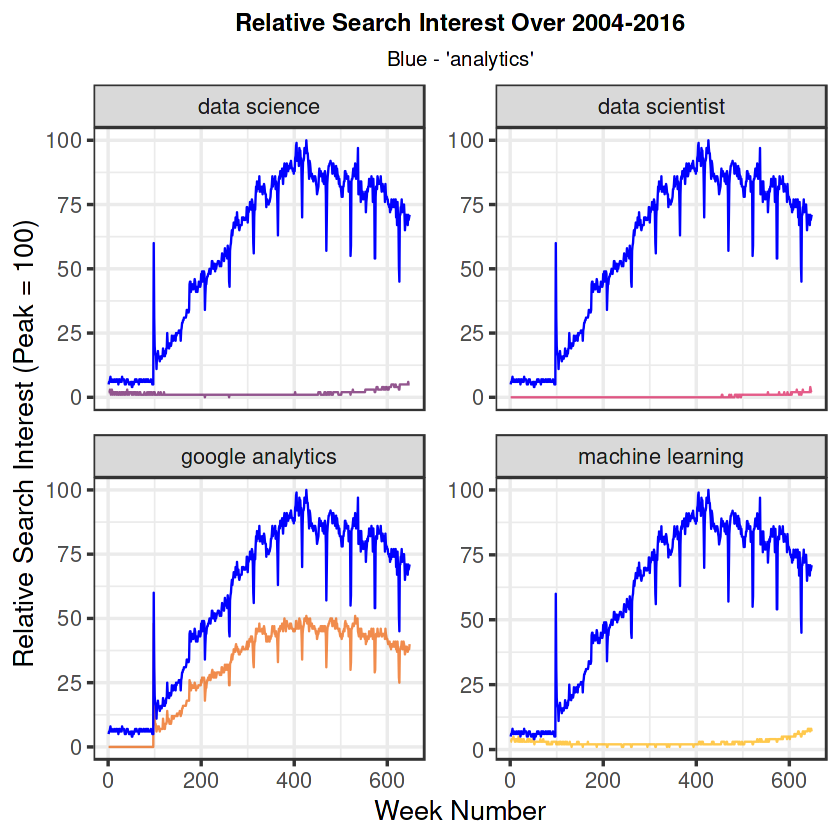

In [11]:
# Plot relative search interest over weeks

my_color_pallete <- c("#640D5F", "#D91656", "#EB5B00", "#FFB200")

ggplot(
    data=case_table_longer,
    aes(x=WeekID, y= search_value, group=search_term, color = search_term)) +

geom_line(alpha=0.7)+
geom_line(data=case_table, aes(x=WeekID, y=analytics, group=1), color="blue")+
facet_wrap(~search_term,scales="free_y")+
labs(
    title="Relative Search Interest Over 2004-2016",
    subtitle= "Blue - 'analytics'",
    x = "Week Number",
    y = "Relative Search Interest (Peak = 100)"
)+
scale_color_manual(
    values = my_color_pallete
)+
theme_bw(base_size=16)+
theme(
    plot.title = element_text(hjust=0.5,face="bold",size=14),
    plot.subtitle = element_text(hjust=0.5,size=12),
    panel.spacing = unit(1, "lines"),
    legend.position="none"
)

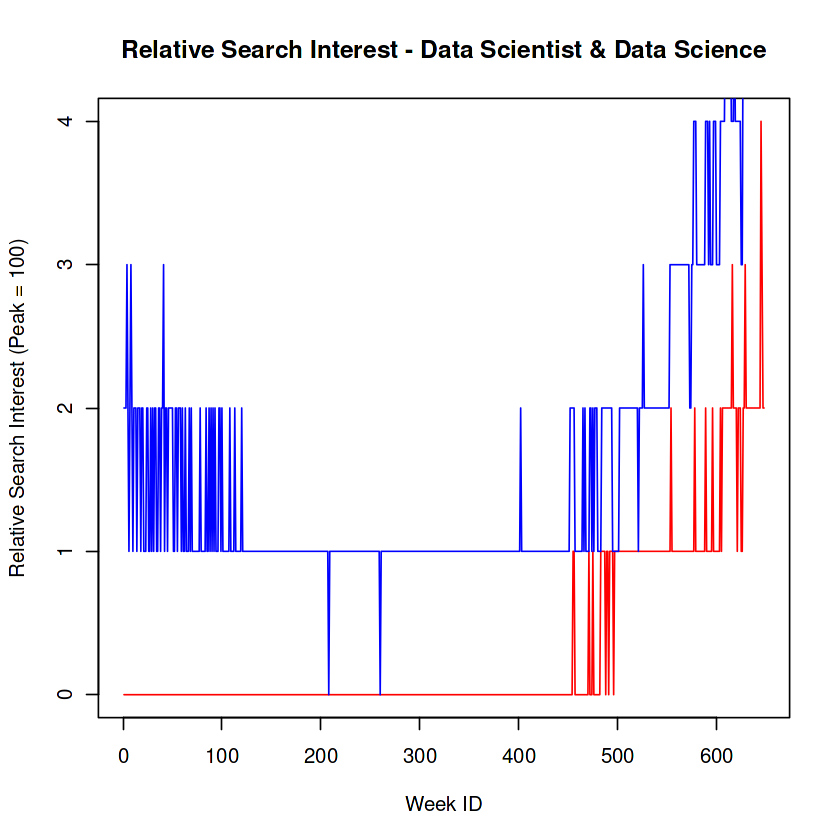

In [12]:
# Seems like 'data scientist' is too narrow. It has very few searches
# The same applies to the search terms 'data science' as well
# Is there a difference between the 'data science' and 'data scientist'?

par(mfrow = c(1,1))
plot(case_table$WeekID, case_table$`data scientist`,
    main = "Relative Search Interest - Data Scientist & Data Science",
     ylab = "Relative Search Interest (Peak = 100)",
     xlab = "Week ID",
     type = 'l',
     col = 'red'
    )
lines(case_table$WeekID,case_table$`data science`, type='l', col='blue')

1. The search interest in "analytics" is significantly higher than that all versions of "data science," making the latter less prominent or noticeable in comparison.
2. The relative search interest only goes upto 4 out of a maximum value of 100 for both 'data scientist' and 'data science' search terms.

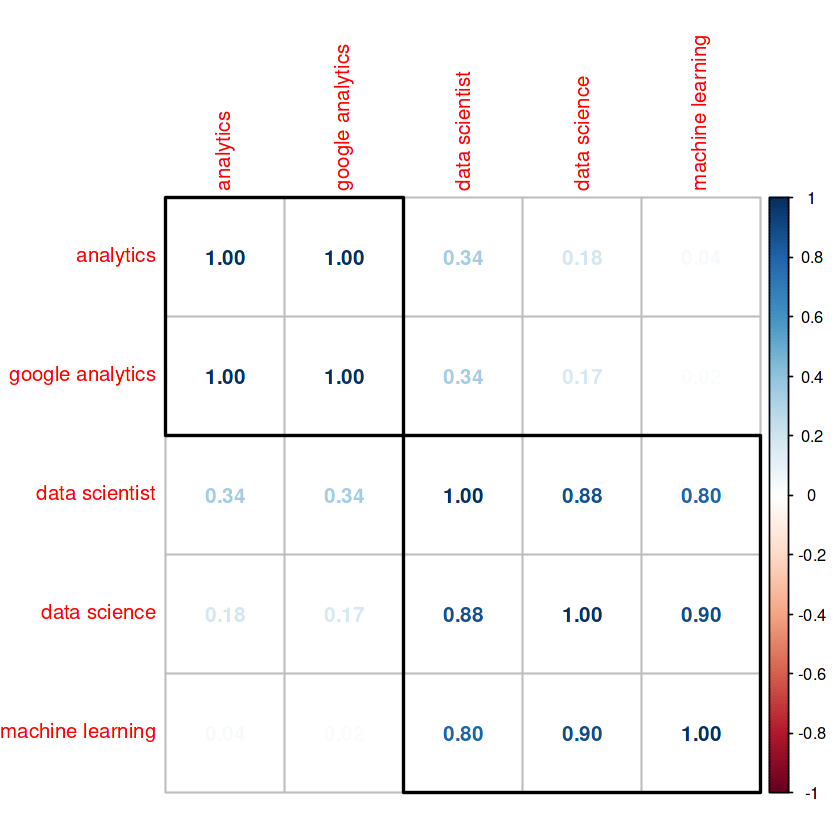

In [22]:
# Correlation analysis

# Subset the search terms
search_terms <- case_table[,c(2,3,4,5,6)]

# Calculate the correlation matrix
correlation_matrix <- cor(search_terms)

# Visualize the correlation matrix
corrplot(correlation_matrix, method = 'number', order='hclust', addrect=2)

1. People searching for "**data science**" often look up "**data scientist**," too (they’re 88% correlated). If we use both terms in our content, we’ll probably reach the same audience.

2. "**analytics**" and "**machine learning**" don’t really overlap in searches. People look for these topics separately, so we should keep our strategies for them distinct.

3. "**data science**" and "**machine learning**" are almost always searched together (90% correlated). If we talk about one, the other’s audience will likely care, too. Covering both in our content works great!

4. The correlation of the search interest between 'data science' and 'analytics' is only 18%. This suggest that these two searches are not happening in a similar way. These maybe different people searching or people searching for different content.